### @GRIPAPRIL2023 : The Sparks Foundation

### TASK-2: Exploratory Data Analysis - Terrorism

Dataset: https://bit.ly/2TK5Xn5



####Author: BABLU PRASAD

### Importing all the libraries required for analysis

In [ ]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Display all columns
pd.set_option('display.max_columns',200)

# Display all rows
pd.options.display.max_rows = None

##Read the Data

In [ ]:
#The data string is of latin1 encoding instead of UTF-8 encoding
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding ='latin1')
df.head()

<ipython-input-3-4c682c9a5853>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding ='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
# Types of all columns
df.info(verbose=True)                    # verbose is used to display the data else it will not show

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [ ]:
df.shape

(181691, 135)

##Data Quality check and missing values**

**Deal with duplicated data**

In [ ]:
#Deal with duplicated data
df.duplicated().sum()

0

**Deal with missing data**

In [ ]:
# Percentage of null values in each column
null_percentage = df.isnull().sum() * 100 / len(df)

In [ ]:
# Top columns have highest percentages of null values
null_percentage.sort_values(ascending = False).head(50)

gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4           99.959822
weaptype4_txt       99.959822
claimmode3          99.926799
claimmode3_txt      99.926799
gsubname2           99.911938
claim3              99.824978
guncertain3         99.823877
gname3              99.821675
divert              99.821675
attacktype3         99.764435
attacktype3_txt     99.764435
ransomnote          99.717102
ransompaidus        99.696187
ransomamtus         99.690133
claimmode2          99.660963
claimmode2_txt      99.660963
ransompaid          99.574002
corp3               99.435305
targsubtype3        99.396228
targsubtype3_txt    99.396228
natlty3_txt         99.368708
natlty3             99.368708
target3             99.353298
targtype3           99.352747
targtype3_txt       99.352747
ransomamt           99.256980
weapsubtype3_txt    99.068198
weapsubtype3        99.068198
weaptype3_txt       98.974633
weaptype3           98.974633
claim2    

In [ ]:
# List all of the columns having null values more than 45%
null_columns = null_percentage[null_percentage.values>45].index
null_columns

Index(['approxdate', 'resolution', 'location', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert'

In [ ]:
# Remove those columns
df.drop(null_columns, axis=1, inplace=True)

In [ ]:
df.describe(include='all')

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691,181691.000000,181691,181270,181257,177135.000000,1.771340e+05,181685.000000,181691.000000,115562,181691.000000,181691.000000,181691.000000,181690.000000,181690.000000,181691.000000,181691.000000,181691.000000,181691,181691.000000,181691,171318.000000,171318,139141,181055,180132.000000,180132,181691,181311.000000,181691.000000,110576.000000,112202.000000,115571.000000,181691.000000,181691,160923.000000,160923,114021,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,181513.000000,115500,181691,181691.000000,181691.000000,181691.000000,181691.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,205,NaN,12,2855,36674,NaN,NaN,NaN,NaN,112492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,22,NaN,112,33238,86006,NaN,215,3537,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,30,19148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83988,26,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Iraq,NaN,Middle East & North Africa,Baghdad,Unknown,NaN,NaN,NaN,NaN,"09/00/2016: Sometime between September 18, 201...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bombing/Explosion,NaN,Private Citizens & Property,NaN,Unnamed Civilian/Unspecified,Unknown,Civilians,NaN,Iraq,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Explosives,NaN,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Committee on Government Operations United Stat...,START Primary Collection,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,24636,NaN,50474,7645,9775,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88255,NaN,43511,NaN,11596,16356,6461,NaN,24113,82782,NaN,NaN,NaN,NaN,NaN,NaN,92426,NaN,44980,20925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,78002,NaN,NaN,NaN,NaN
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,NaN,7.160938,NaN,NaN,NaN,23.498343,-4.586957e+02,1.451452,0.068297,NaN,0.988530,0.993093,0.875668,-0.523171,0.137773,0.889598,0.036507,3.247547,NaN,8.439719,NaN,46.971474,NaN,NaN,NaN,127.686441,NaN,NaN,0.081440,0.002950,-65.361154,-1.517727,0.049666,6.447325,NaN,11.117162,NaN,NaN,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,0.059054,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,NaN,2.933408,NaN,NaN,NaN,18.569242,2.047790e+05,0.995430,0.284553,NaN,0.106483,0.082823,0.329961,2.455819,0.344663,0.313391,0.187549,1.915772,NaN,6.653838,NaN,30.953357,NaN,NaN,NaN,89.299120,NaN,NaN,0.273511,0.054234,216.536633,12.830346,1.093195,2.173435,NaN,6.495612,NaN,NaN,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.461244,NaN,NaN,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,NaN,1.000000,NaN,NaN,NaN,-53.154613,-8.618590e+07,1.000000,-9.000000,NaN,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,NaN,5.000000,NaN,NaN,NaN,11.510046,4.545640e+00,1.000000,0.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,NaN,3.000000,NaN,22.000000,NaN,NaN,NaN,83.000000,NaN,NaN,0.000000,0.000000,-99.000000,0.000000,0.000000,5.000000,NaN,5.000000,NaN,NaN,0.000000,0.000000,

In [ ]:
# List of remaining columns which have null values
null_percentage = df.isnull().sum() * 100 / len(df)
null_percentage[null_percentage>0].sort_values(ascending = False)

nperps              39.140629
nperpcap            38.245703
nwoundte            38.055270
weapdetail          37.244553
nkillter            36.852678
scite1              36.430533
summary             36.396409
claimed             36.391456
nwoundus            35.611010
nkillus             35.470111
corp1               23.418882
weapsubtype1        11.430396
weapsubtype1_txt    11.430396
nwound               8.977330
targsubtype1_txt     5.709144
targsubtype1         5.709144
nkill                5.676120
longitude            2.508104
latitude             2.507554
natlty1              0.858050
natlty1_txt          0.858050
target1              0.350045
city                 0.238867
provstate            0.231712
guncertain1          0.209146
ishostkid            0.097969
specificity          0.003302
multiple             0.000550
doubtterr            0.000550
dtype: float64

In [ ]:
# Show all numerical columns
df.describe().columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

**Deal with uneccessary columns**

In [ ]:
# count the number of unique values in each column
unique_counts = df.nunique()

# filter the columns based on unique value count
df = df.loc[:, unique_counts > 1]
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [ ]:
# Get the number of rows in the DataFrame
num_rows = len(df)

# Get the number of unique values in each column
unique_counts = df.nunique()

# Select the columns where the number of unique values is equal to the number of rows
result = unique_counts[unique_counts == num_rows].index.tolist()

# Print the result
print(result)

['eventid']


In [ ]:
df.shape

(181691, 58)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [ ]:
df.head(2)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1


## Cleaning the data

In [ ]:
#Taking column which is useful to me for EDA
df = df[['eventid','country_txt','region_txt','iyear','imonth','iday','latitude','city',
          'longitude','attacktype1_txt','targtype1_txt','targsubtype1_txt','target1',
          'gname','natlty1_txt','nkill','nwound','weaptype1_txt']]
df.head(2)

,eventid,country_txt,region_txt,iyear,imonth,iday,latitude,city,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,natlty1_txt,nkill,nwound,weaptype1_txt
0,197000000001,Dominican Republic,Central America & Caribbean,1970,7,2,18.456792,Santo Domingo,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,Dominican Republic,1.0,0.0,Unknown
1,197000000002,Mexico,North America,1970,0,0,19.371887,Mexico city,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,Belgium,0.0,0.0,Unknown


In [ ]:
# Rename the columns
new_names = {'country_txt': 'country', 'region_txt': 'region', 'iyear': 'year', 
             'imonth': 'number_of_months', 'iday': 'number_of_days', 'latitude':'Latitude',
             'longitude':'Longitude','attacktype1_txt': 'attackType', 'targtype1_txt': 'target_type', 
             'targsubtype1_txt': 'target_subtype','target1': 'target','gname':'group',
             'natlty1_txt': 'nationality','nkill':'killed','nwound':'wounded',
             'weaptype1_txt': 'weapon_type','attacktype1_txt':'attackType'}
df = df.rename(columns=new_names)

In [ ]:
df.head(2)

,eventid,country,region,year,number_of_months,number_of_days,Latitude,city,Longitude,attackType,target_type,target_subtype,target,group,nationality,killed,wounded,weapon_type
0,197000000001,Dominican Republic,Central America & Caribbean,1970,7,2,18.456792,Santo Domingo,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,Dominican Republic,1.0,0.0,Unknown
1,197000000002,Mexico,North America,1970,0,0,19.371887,Mexico city,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,Belgium,0.0,0.0,Unknown


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   country           181691 non-null  object 
 2   region            181691 non-null  object 
 3   year              181691 non-null  int64  
 4   number_of_months  181691 non-null  int64  
 5   number_of_days    181691 non-null  int64  
 6   Latitude          177135 non-null  float64
 7   city              181257 non-null  object 
 8   Longitude         177134 non-null  float64
 9   attackType        181691 non-null  object 
 10  target_type       181691 non-null  object 
 11  target_subtype    171318 non-null  object 
 12  target            181055 non-null  object 
 13  group             181691 non-null  object 
 14  nationality       180132 non-null  object 
 15  killed            171378 non-null  float64
 16  wounded           16

In [ ]:
df.shape

(181691, 18)

In [ ]:
df["killed"]=df["killed"].fillna(0)
df["wounded"]=df["wounded"].fillna(0)
df["casualty"]=df["killed"]+df["wounded"]

In [ ]:
#Remving duplicate value
df.duplicated().sum()

0

In [ ]:
df.describe(include='all')

,eventid,country,region,year,number_of_months,number_of_days,Latitude,city,Longitude,attackType,target_type,target_subtype,target,group,nationality,killed,wounded,weapon_type,casualty
count,1.816910e+05,181691,181691,181691.000000,181691.000000,181691.000000,177135.000000,181257,1.771340e+05,181691,181691,171318,181055,181691,180132,181691.000000,181691.000000,181691,181691.000000
unique,NaN,205,12,NaN,NaN,NaN,NaN,36674,NaN,9,22,112,86006,3537,215,NaN,NaN,12,NaN
top,NaN,Iraq,Middle East & North Africa,NaN,NaN,NaN,NaN,Unknown,NaN,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians,Unknown,Iraq,NaN,NaN,Explosives,NaN
freq,NaN,24636,50474,NaN,NaN,NaN,NaN,9775,NaN,88255,43511,11596,6461,82782,24113,NaN,NaN,92426,NaN
mean,2.002705e+11,NaN,NaN,2002.638997,6.467277,15.505644,23.498343,NaN,-4.586957e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.266860,2.883296,NaN,5.150156
std,1.325957e+09,NaN,NaN,13.259430,3.388303,8.814045,18.569242,NaN,2.047790e+05,NaN,NaN,NaN,NaN,NaN,NaN,11.227057,34.309747,NaN,40.555416
min,1.970000e+11,NaN,NaN,1970.000000,0.000000,0.000000,-53.154613,NaN,-8.618590e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,1.991021e+11,NaN,NaN,1991.000000,4.000000,8.000000,11.510046,NaN,4.545640e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
50%,2.009022e+11,NaN,NaN,2009.000000,6.000000,15.000000,31.467463,NaN,4.324651e+01,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,1.000000
75%,2.014081e+11,NaN,NaN,2014.000000,9.000000,23.000000,34.685087,NaN,6.871033e+01,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,4.000000


#### Observation
1. The data consists of terrorist activities ranging from the year: 1970 to 2017
2. Maximum number of people killed in an event were: 1570
3. Maximum number of people wounded in an event were: 8191
4. Maximum number of total casualties in an event were: 9574

## Visualizing the data

### 1. Year wise Attacks

1. Number of Attacks in each Year

In [ ]:
attacks=df["year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"year","year":"attacks"})  #sort_values(by='attacks',ascending = False)
attacks.head()

,year,attacks
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


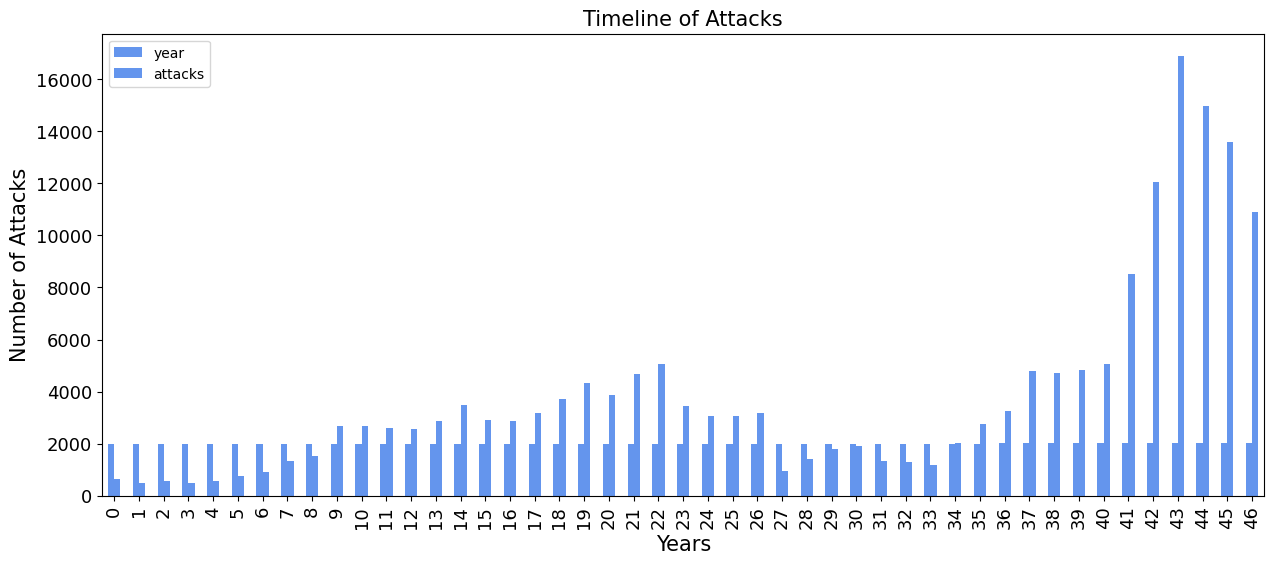

In [91]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(i). Most number of attacks(16903) in 2014<br>
(ii). Least number of attacks(471) in 1971

2. Total Casualties (Killed + Wounded) in each Year

In [ ]:
yc=df[["year","casualty"]].groupby("year").sum()
yc.head()

,casualty
year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


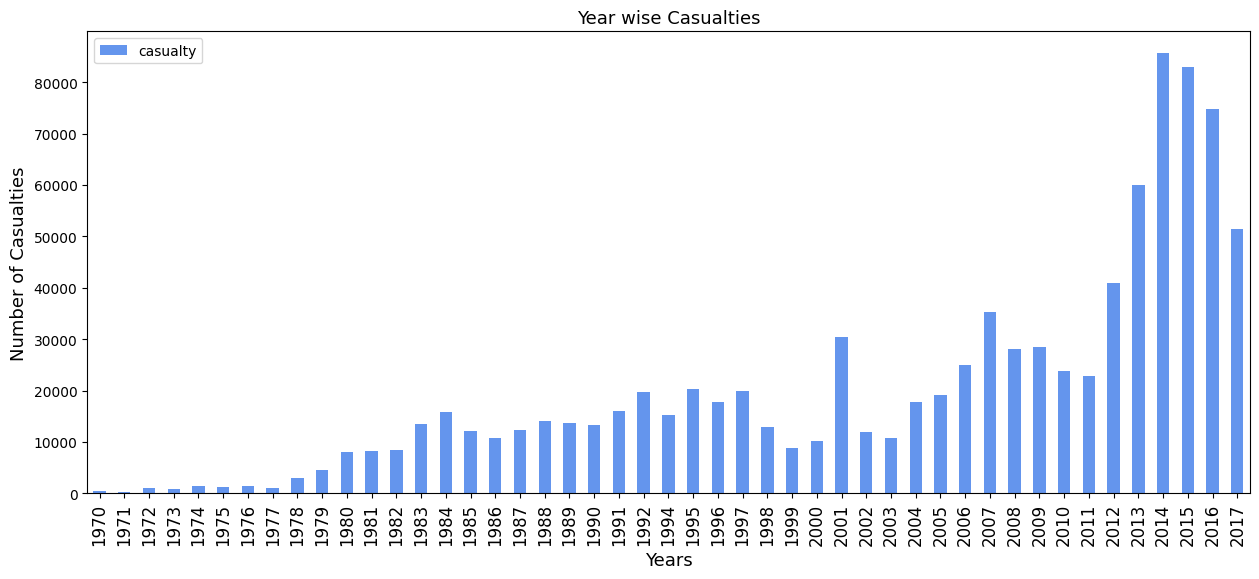

In [ ]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed in each Year

In [ ]:
yk=df[["year","killed"]].groupby("year").sum()
yk.head()

,killed
year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


4. Wounded in each Region

In [ ]:
yw=df[["year","wounded"]].groupby("year").sum()
yw.head()

,wounded
year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


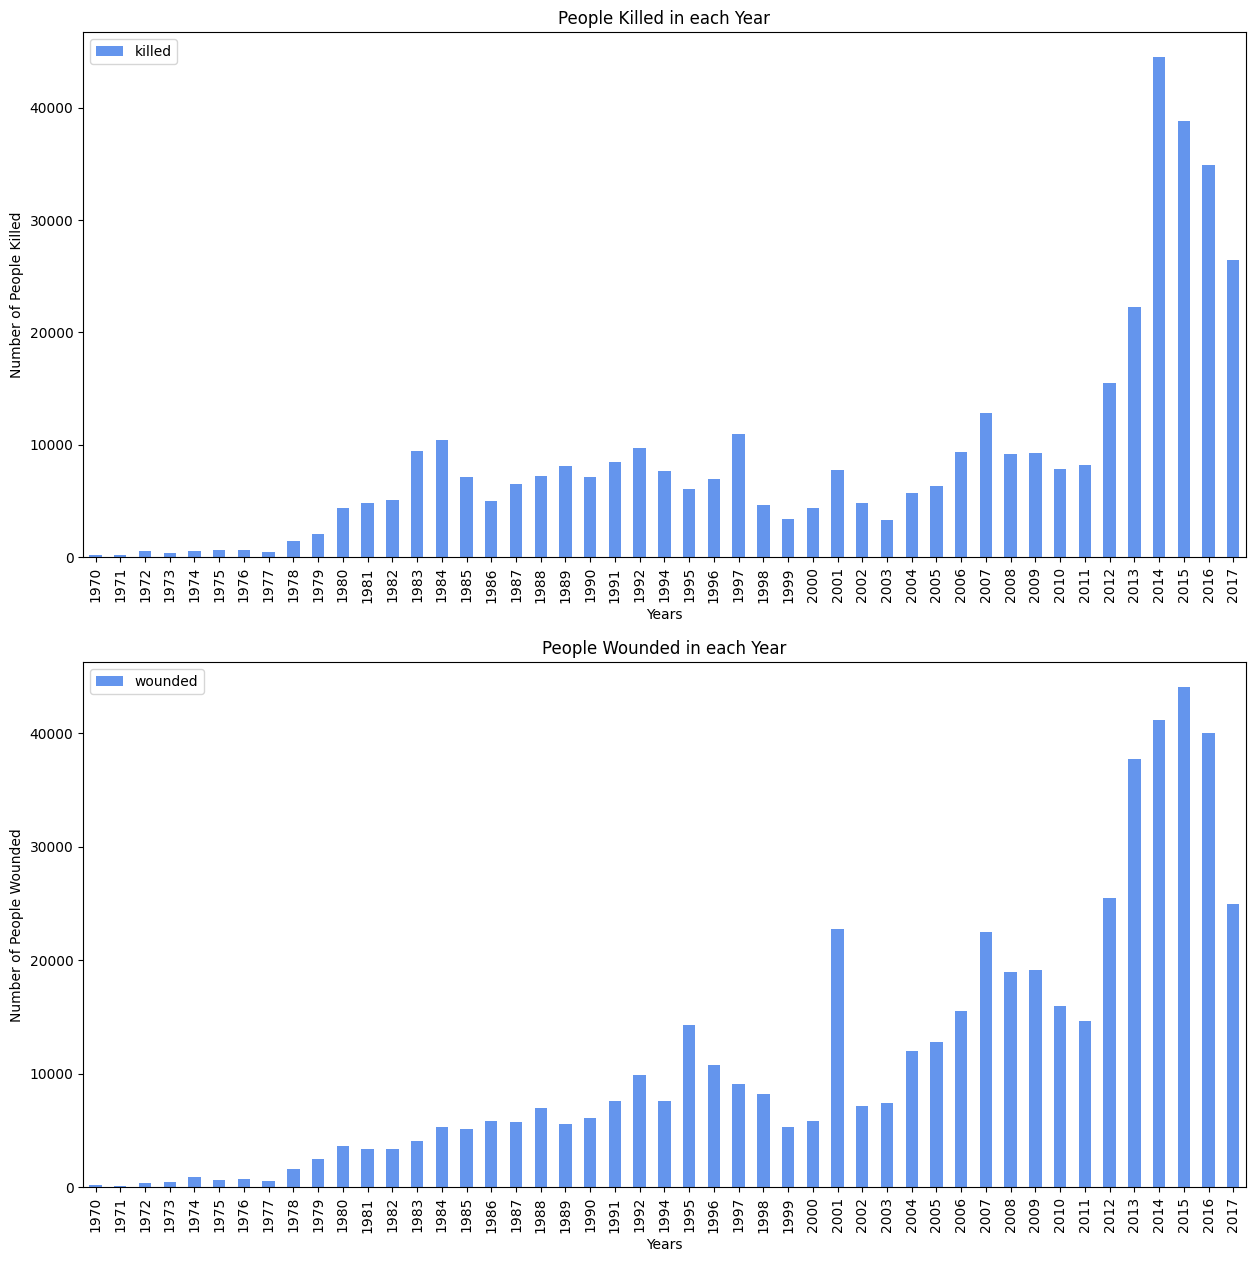

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed") 

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 2. Region wise Attacks

1. Distribution of Terrorist Attacks over Regions from 1970-2017

In [ ]:
reg=pd.crosstab(df.year,df.region)
reg.head()

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


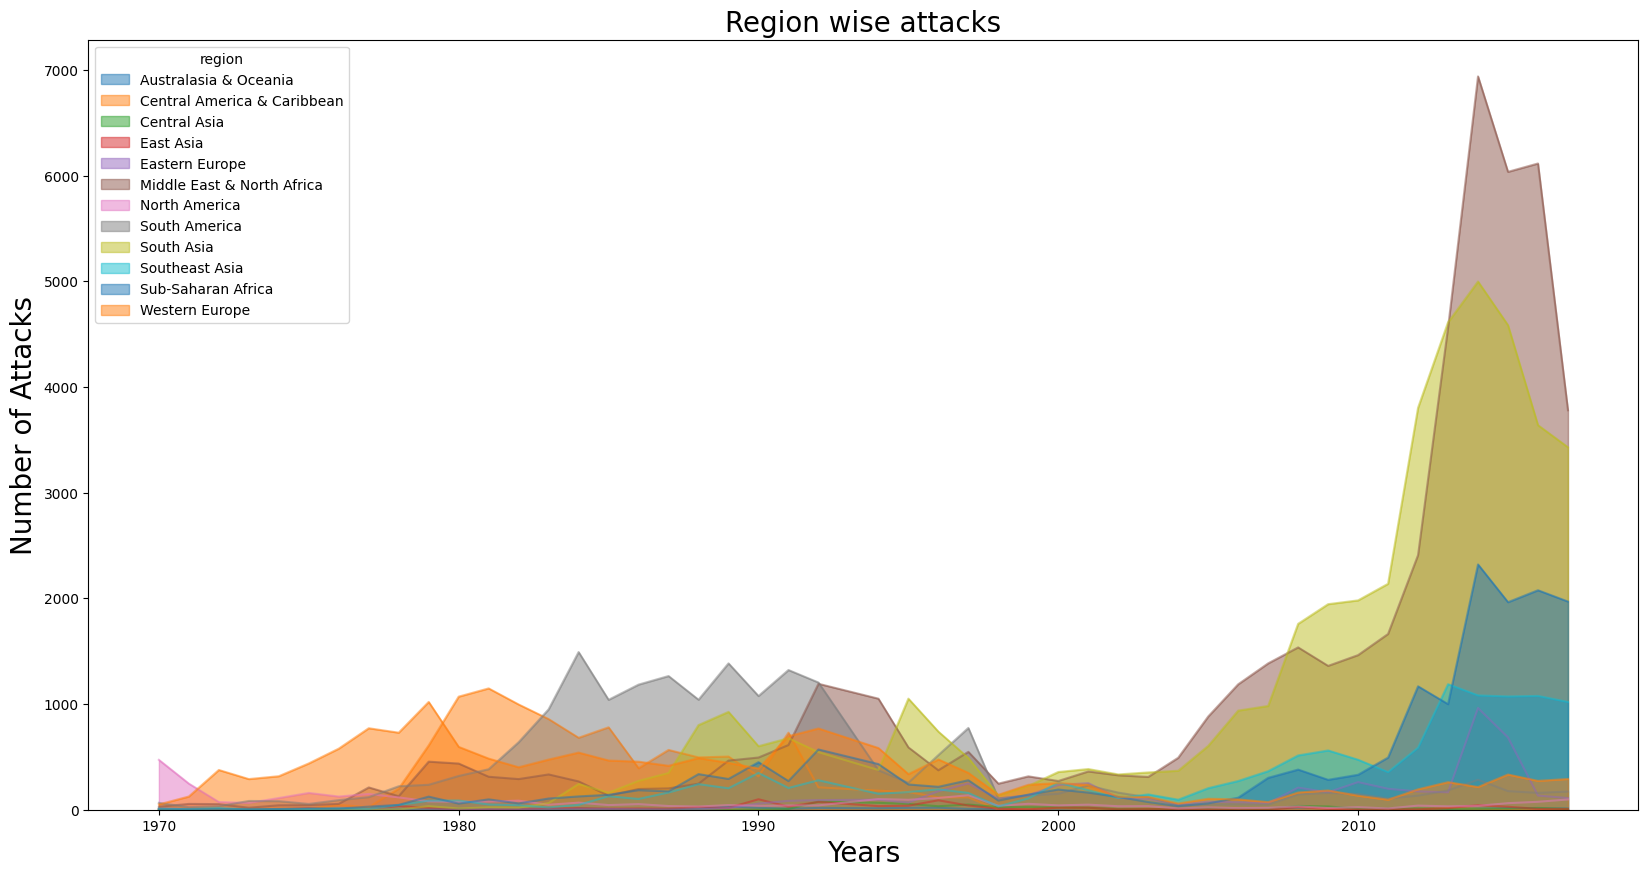

In [ ]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

2. Total Terrorist Attacks in each Region from 1970-2017 

In [ ]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

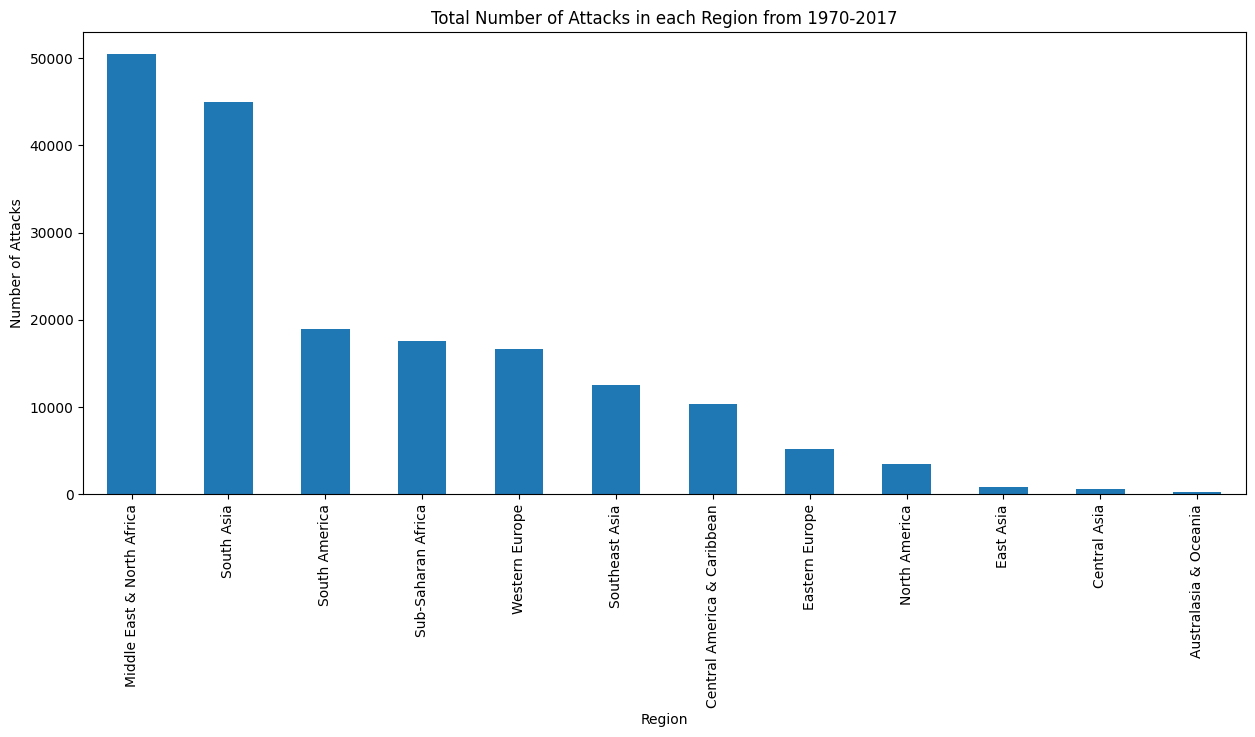

In [ ]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

3. Total Casualties (Killed + Wounded) in each Region

In [ ]:
rc=df[["region","casualty"]].groupby("region").sum().sort_values(by="casualty",ascending=False)
rc

,casualty
region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


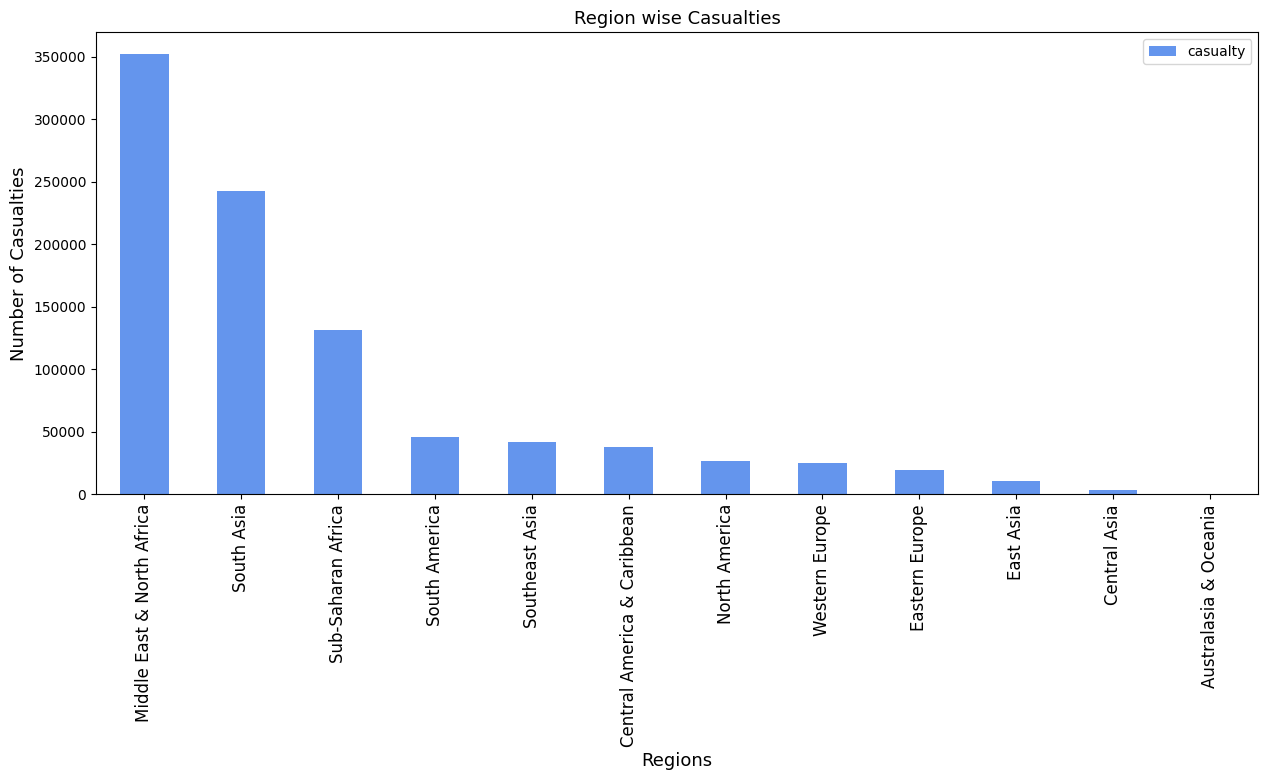

In [ ]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

4. Killed in each Region

In [ ]:
rk=df[["region","killed"]].groupby("region").sum().sort_values(by="killed",ascending=False)
rk

,killed
region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


5. Wounded in each Region

In [ ]:
rw=df[["region","wounded"]].groupby("region").sum().sort_values(by="wounded",ascending=False)
rw

,wounded
region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


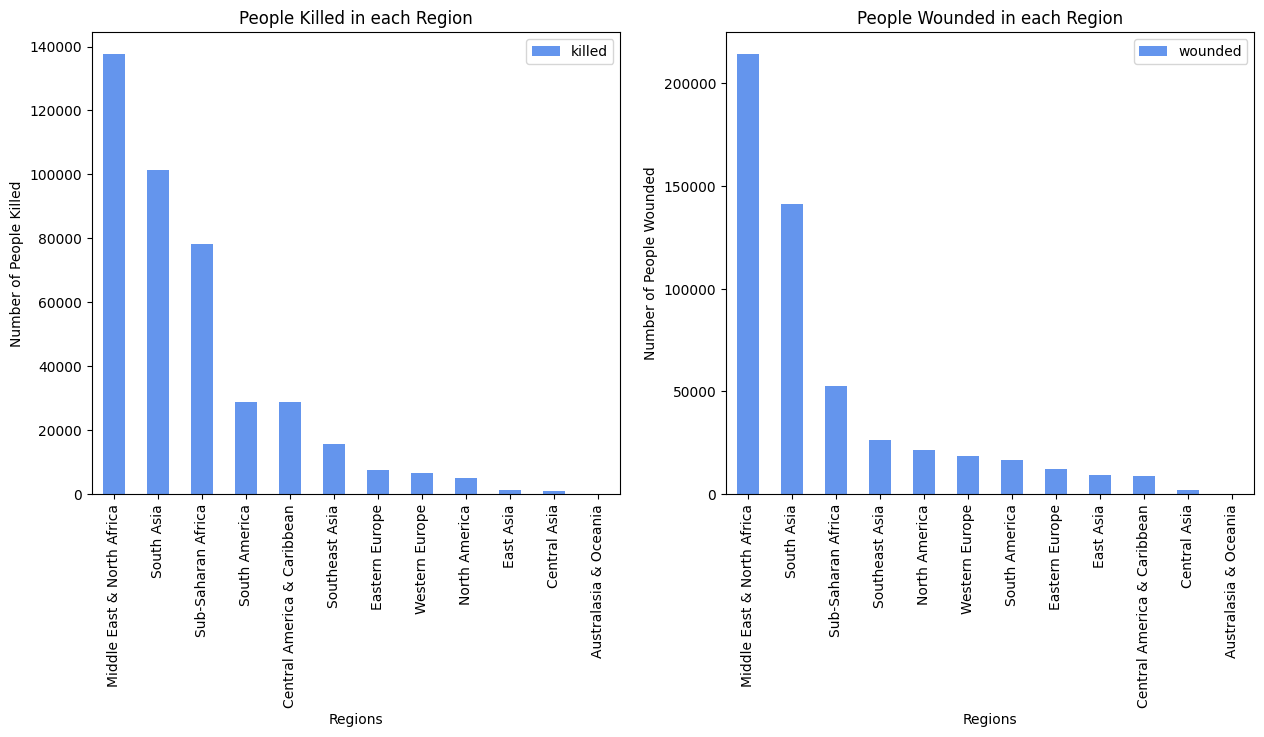

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 3. Country wise Attacks - Top 10

1. Number of Attacks in each Country

In [ ]:
ct=df["country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country, dtype: int64

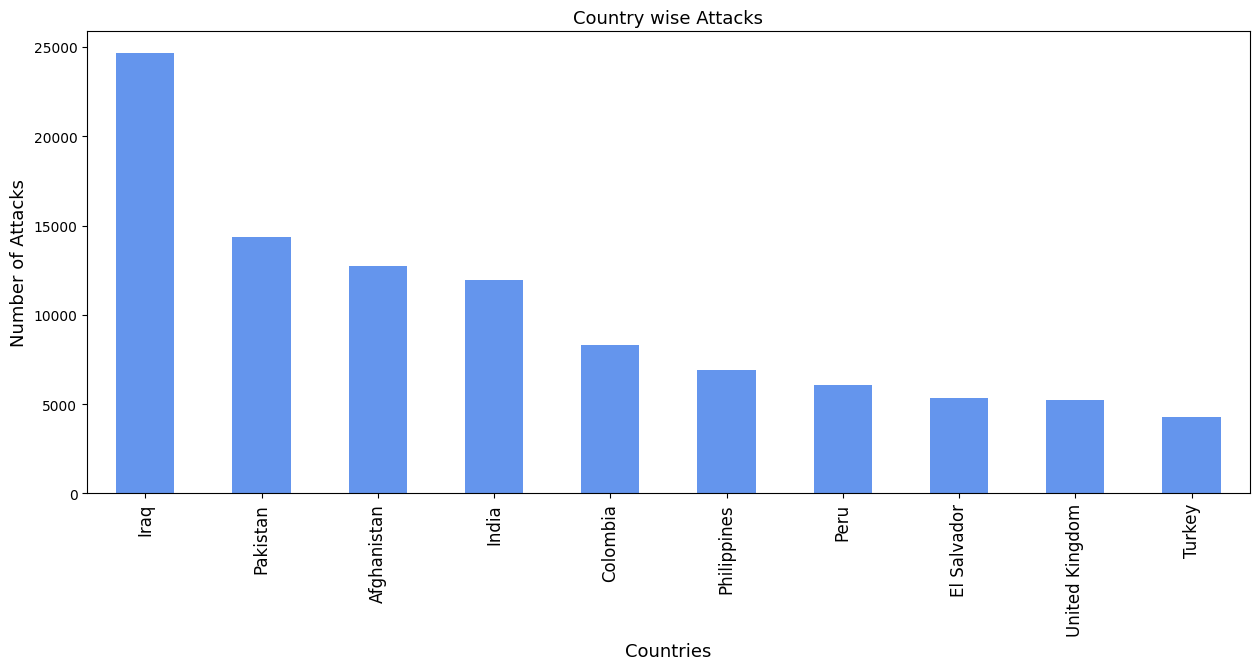

In [ ]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties (Killed + Wounded) in each Country

In [ ]:
cnc=df[["country","casualty"]].groupby("country").sum().sort_values(by="casualty",ascending=False)
cnc.head(10)

,casualty
country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


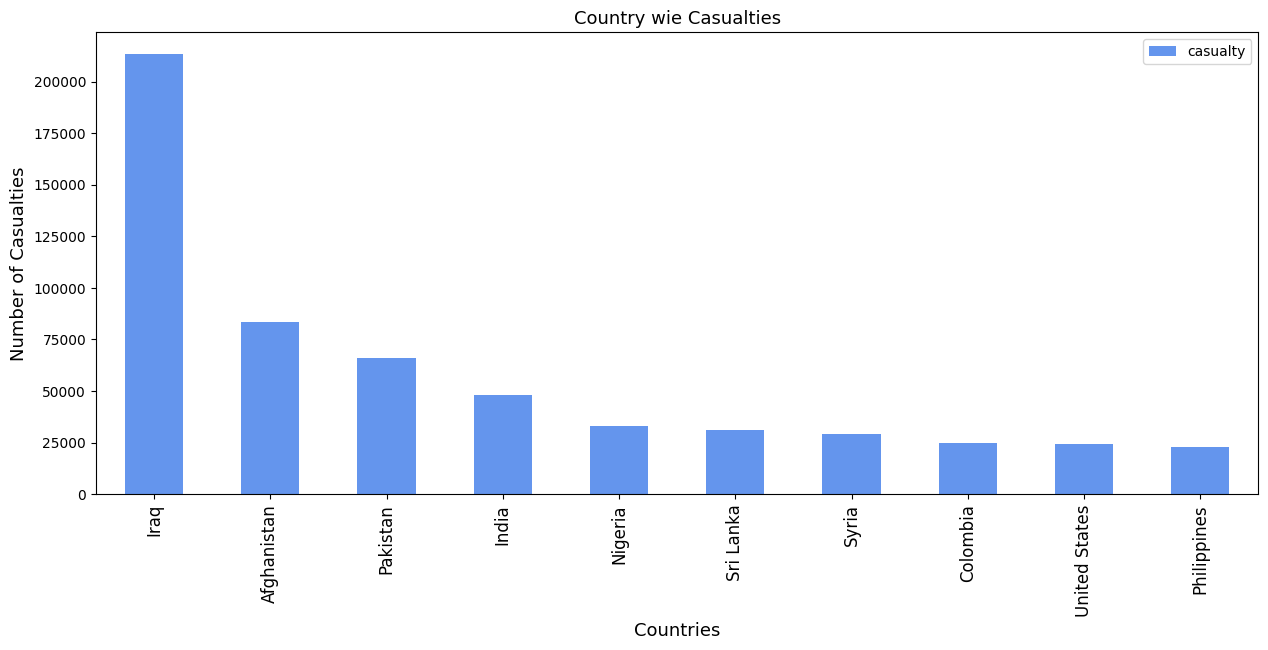

In [ ]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed in each Country

In [ ]:
cnk=df[["country","killed"]].groupby("country").sum().sort_values(by="killed",ascending=False)
cnk.head(10)

,killed
country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


4. Wounded in each Country

In [ ]:
cnw=df[["country","wounded"]].groupby("country").sum().sort_values(by="wounded",ascending=False)
cnw.head(10)

,wounded
country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


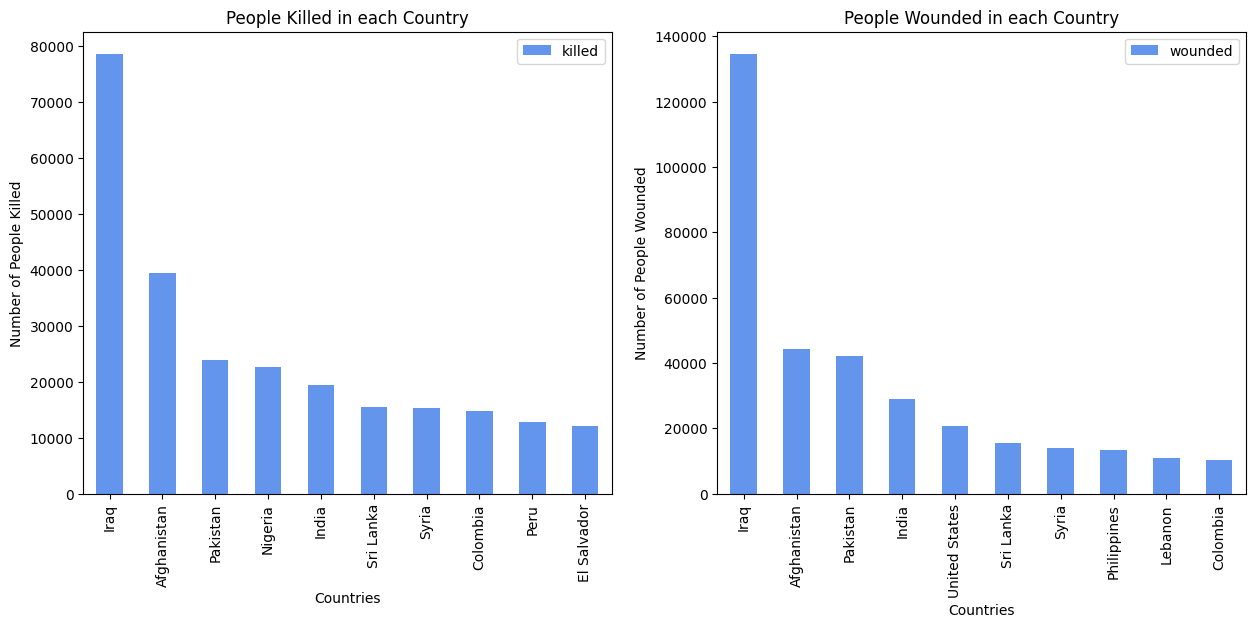

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 4. City wise Attacks - Top 10

1. Number of Attacks in each city

In [ ]:
city=df["city"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: city, dtype: int64

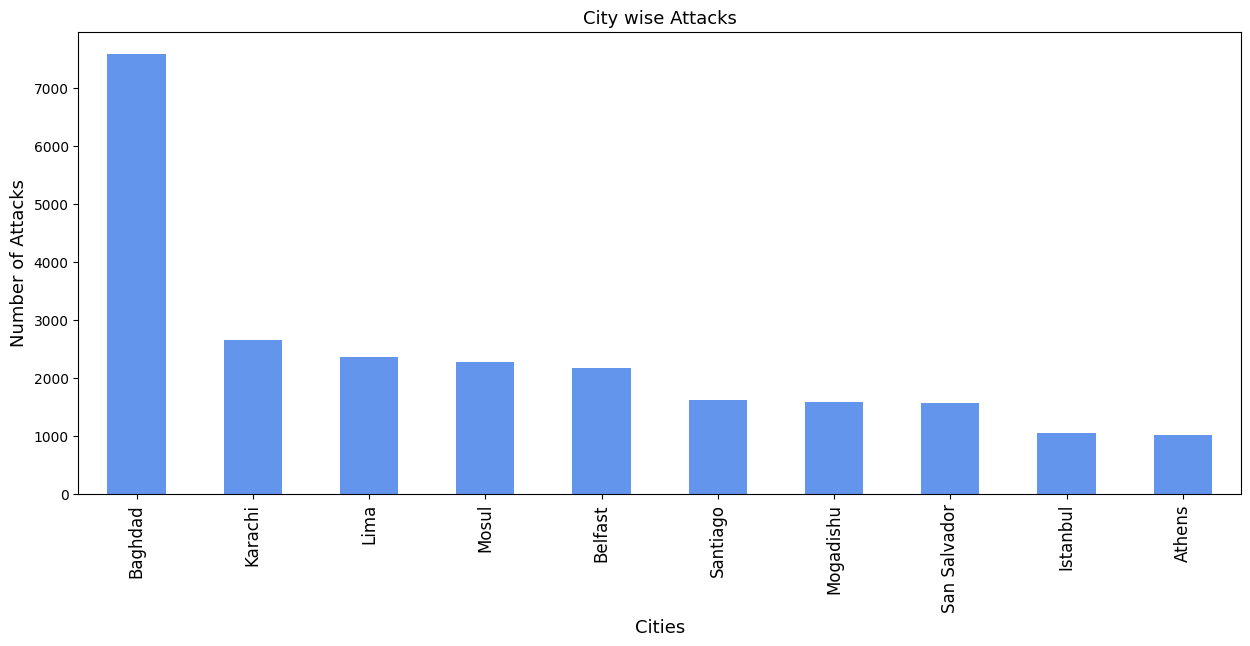

In [ ]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties (Killed + Wounded) in each City

In [ ]:
cc=df[["city","casualty"]].groupby("city").sum().sort_values(by="casualty",ascending=False).drop("Unknown")
cc.head(10)

,casualty
city,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


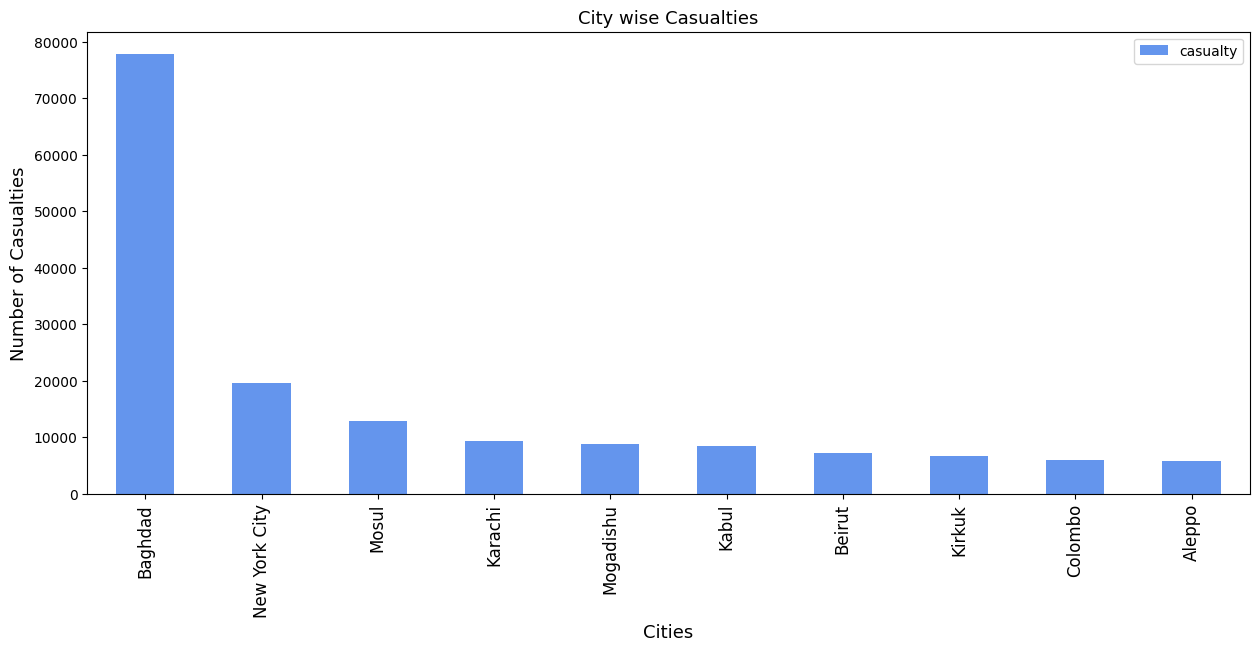

In [ ]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed in each City

In [ ]:
ck=df[["city","killed"]].groupby("city").sum().sort_values(by="killed",ascending=False).drop("Unknown")
ck.head(10)

,killed
city,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


4. Wounded in each City

In [ ]:
cw=df[["city","wounded"]].groupby("city").sum().sort_values(by="wounded",ascending=False).drop("Unknown")
cw.head(10)

,wounded
city,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


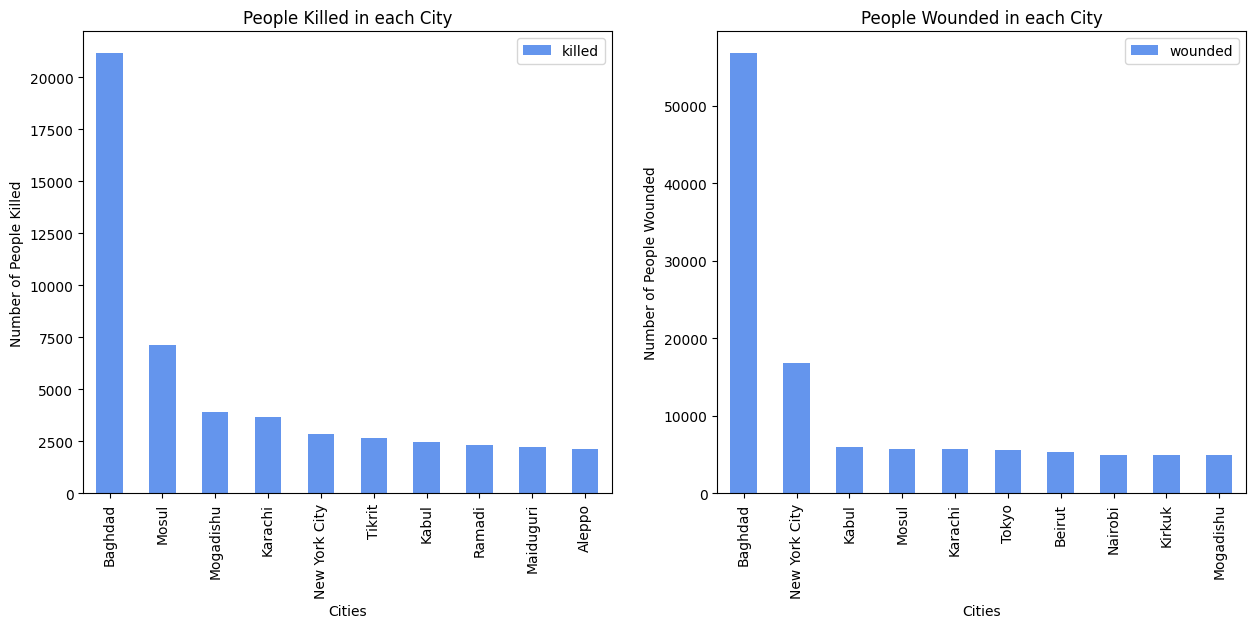

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 5. Terrorist Group wise Attacks - Top 10

1. Number of Attacks by each Group

In [ ]:
grp=df["group"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: group, dtype: int64

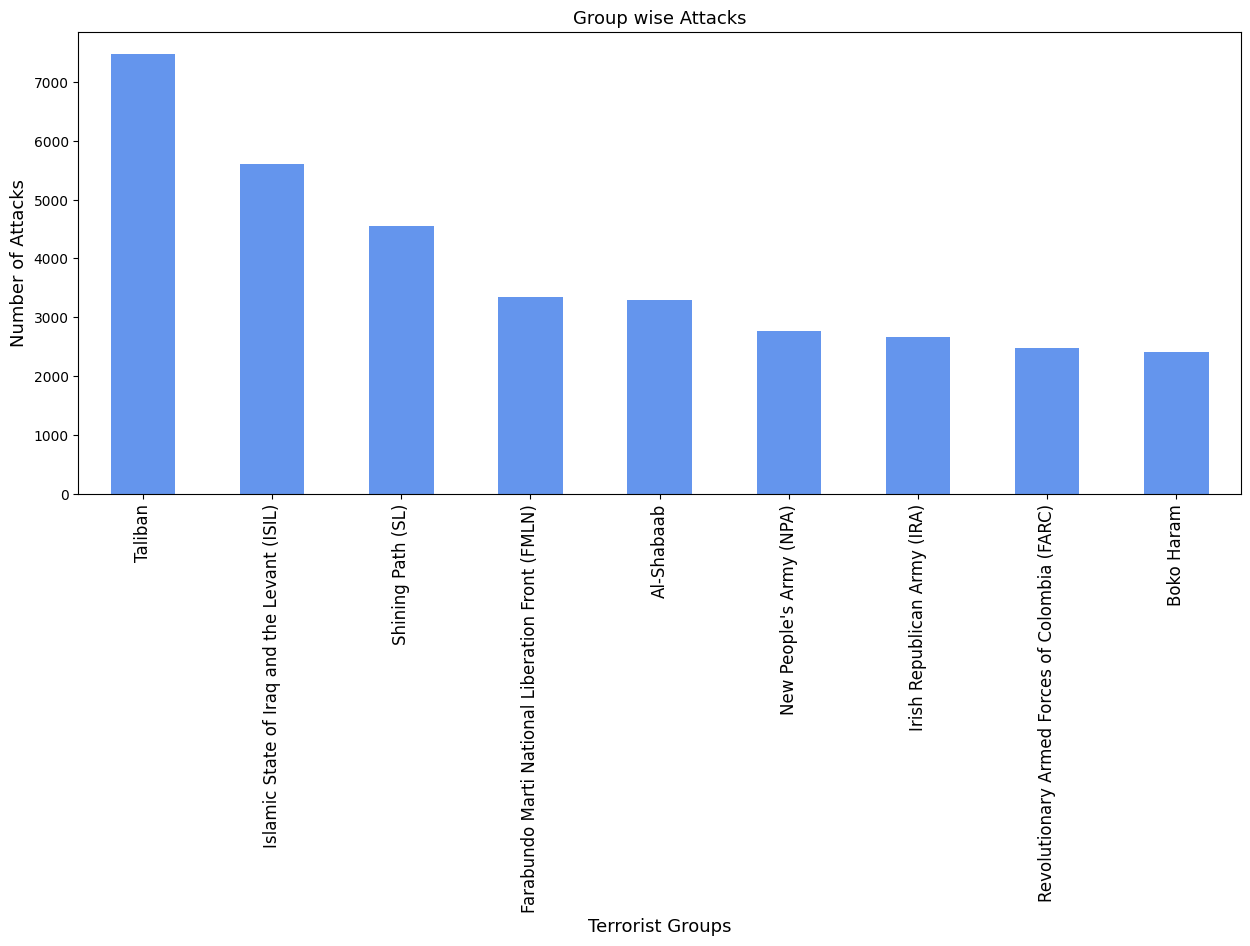

In [ ]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties(Killed + Wounded) by each Group 

In [ ]:
gc=df[["group","casualty"]].groupby("group").sum().sort_values(by="casualty",ascending=False).drop("Unknown")
gc.head(10)

,casualty
group,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


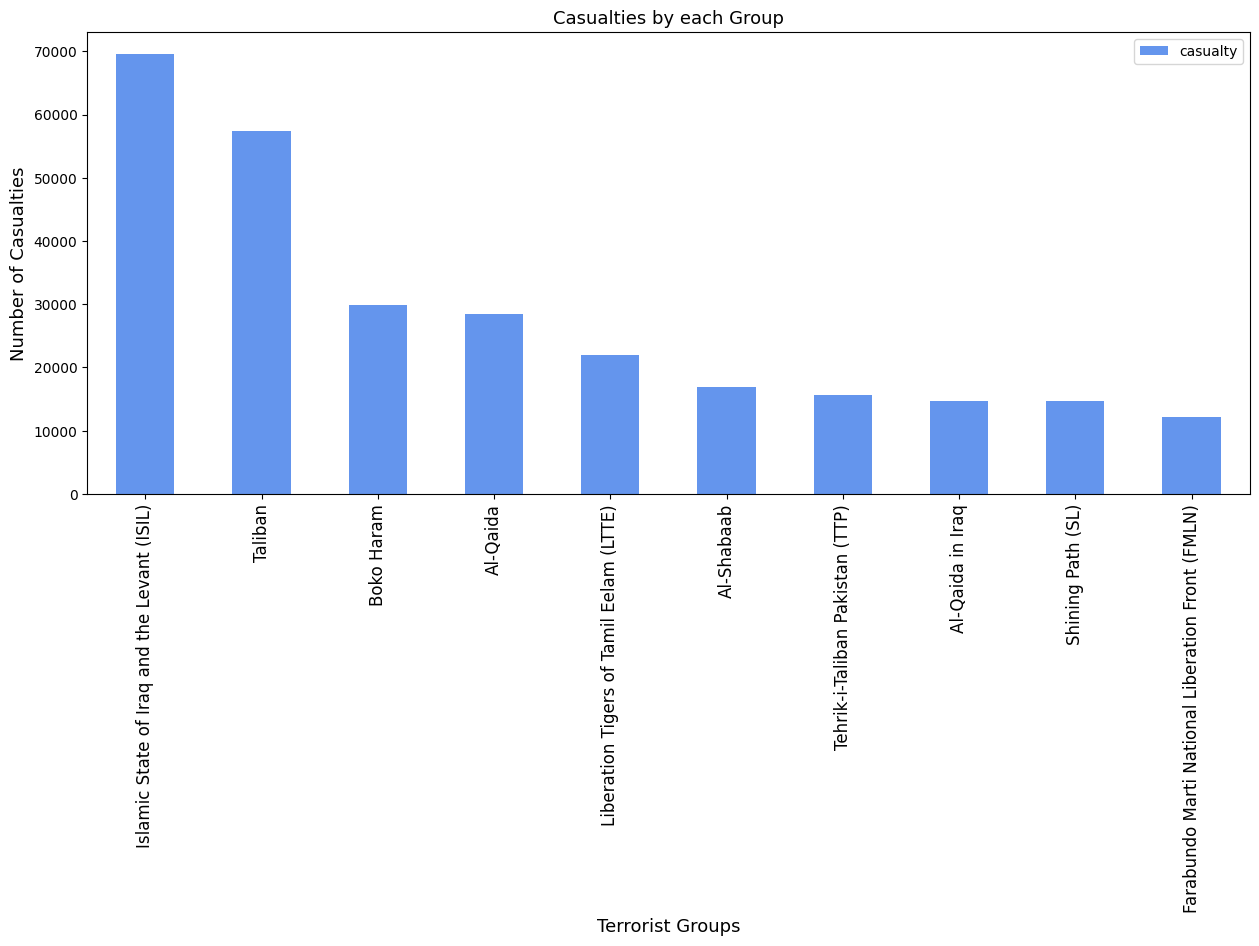

In [ ]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed by each Group

In [ ]:
gk=df[["group","killed"]].groupby("group").sum().sort_values(by="killed",ascending=False).drop("Unknown")
gk.head(10)

,killed
group,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


4. Wounded by each Group

In [ ]:
gw=df[["group","wounded"]].groupby("group").sum().sort_values(by="wounded",ascending=False).drop("Unknown")
gw.head(10)

,wounded
group,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


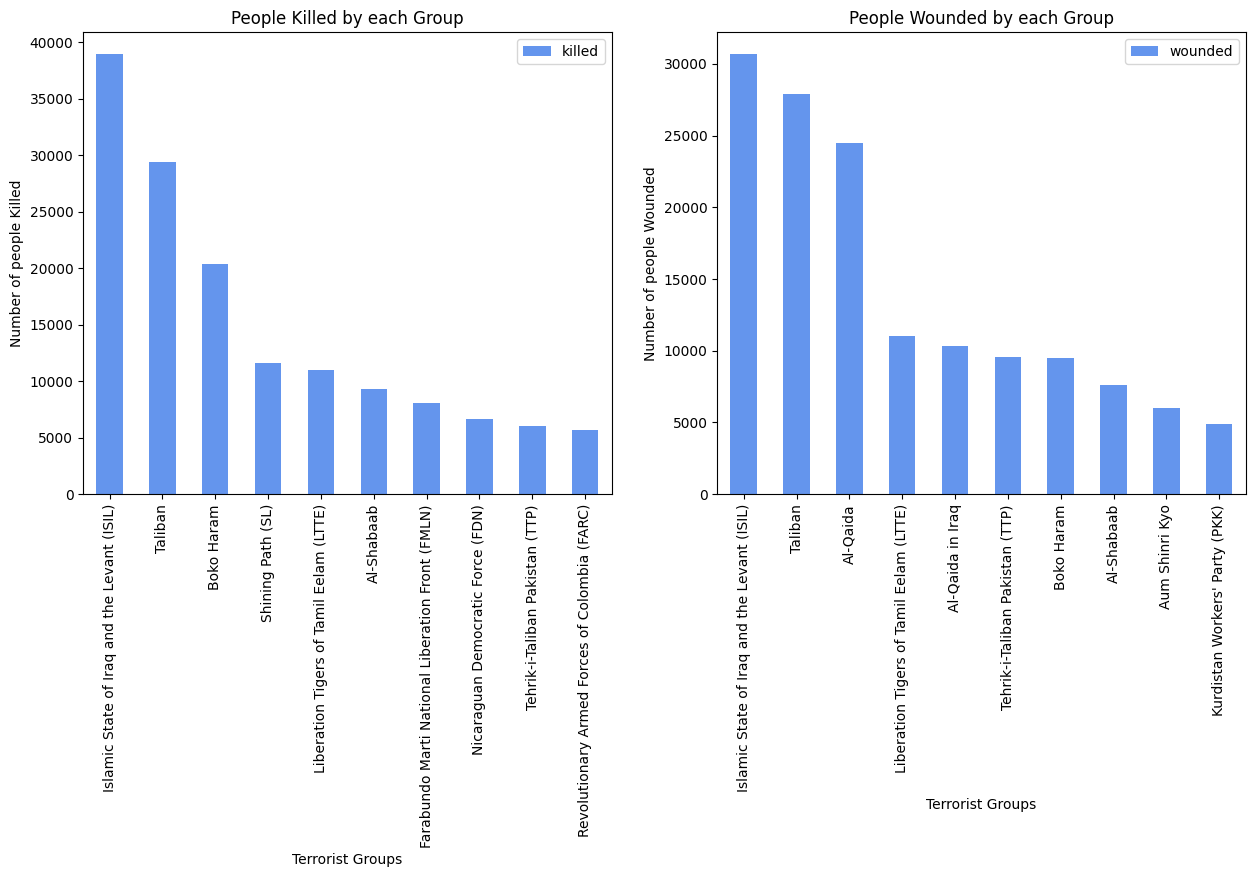

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### 6. Attack Type wise Attacks

1. Number of Attacks by each Attack Type

In [ ]:
at=df["attackType"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attackType, dtype: int64

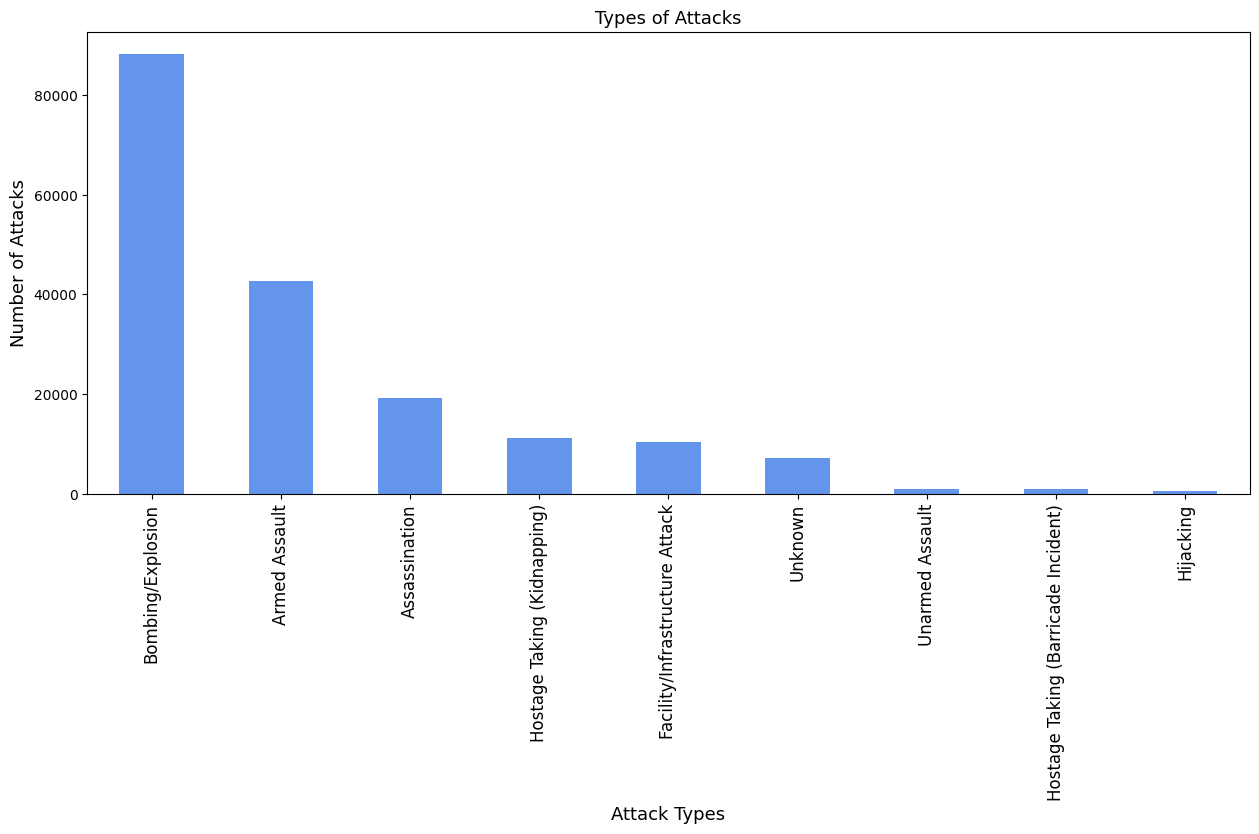

In [ ]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties (Killed + Wounded) by each Attack Type

In [ ]:
ac=df[["attackType","casualty"]].groupby("attackType").sum().sort_values(by="casualty",ascending=False)
ac

,casualty
attackType,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


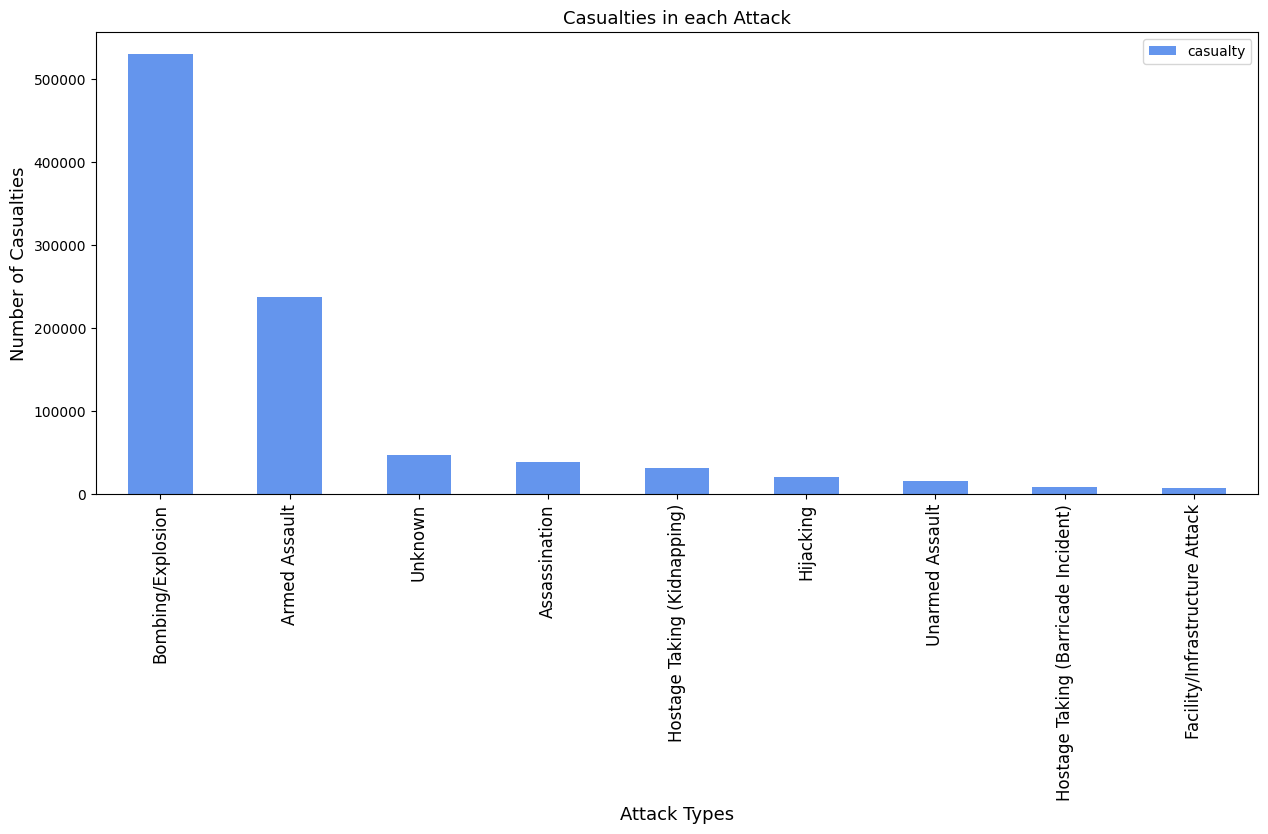

In [ ]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed by each Attack Type

In [ ]:
ak=df[["attackType","killed"]].groupby("attackType").sum().sort_values(by="killed",ascending=False)
ak

,killed
attackType,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


4. Wounded by each Attack Type

In [ ]:
aw=df[["attackType","wounded"]].groupby("attackType").sum().sort_values(by="wounded",ascending=False)
aw

,wounded
attackType,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


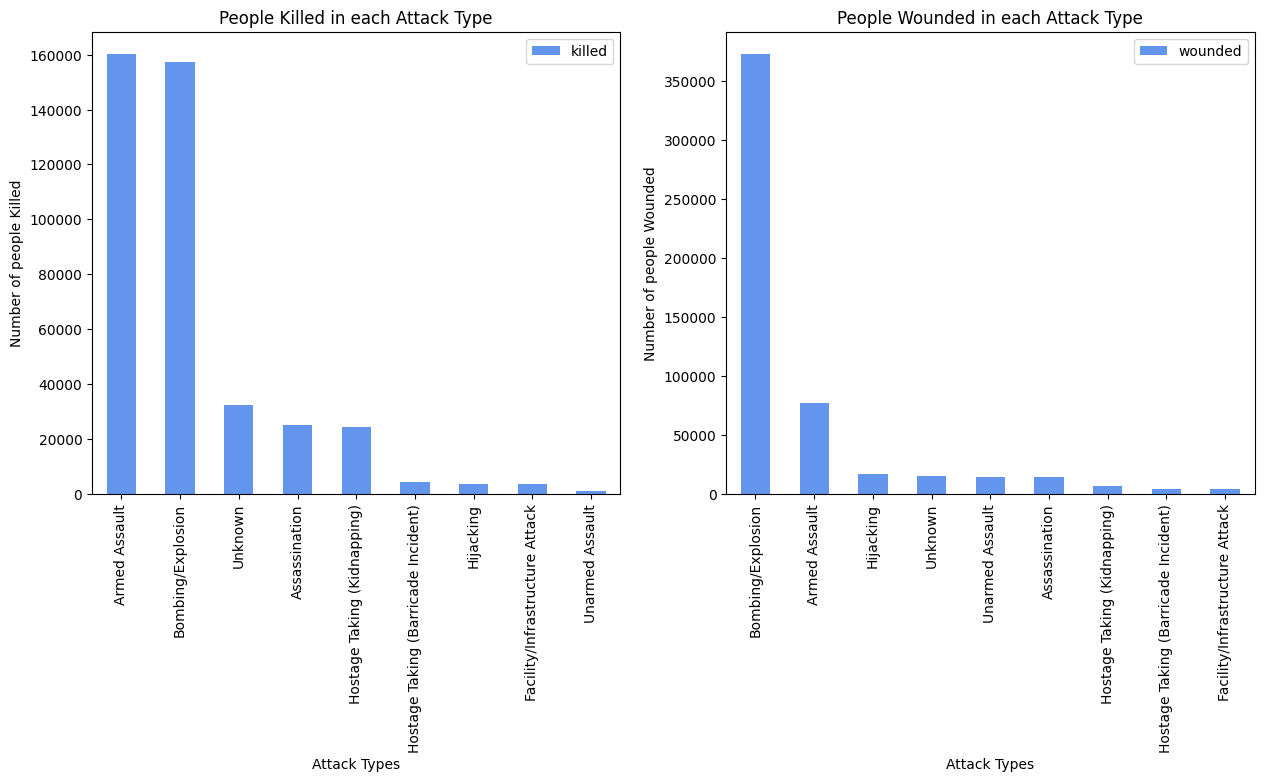

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
aw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### 7. Target Type wise Attacks

1. Number of Attacks over each Target Type

In [ ]:
ta=df["target_type"].value_counts()
ta

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: target_type, dtype: int64

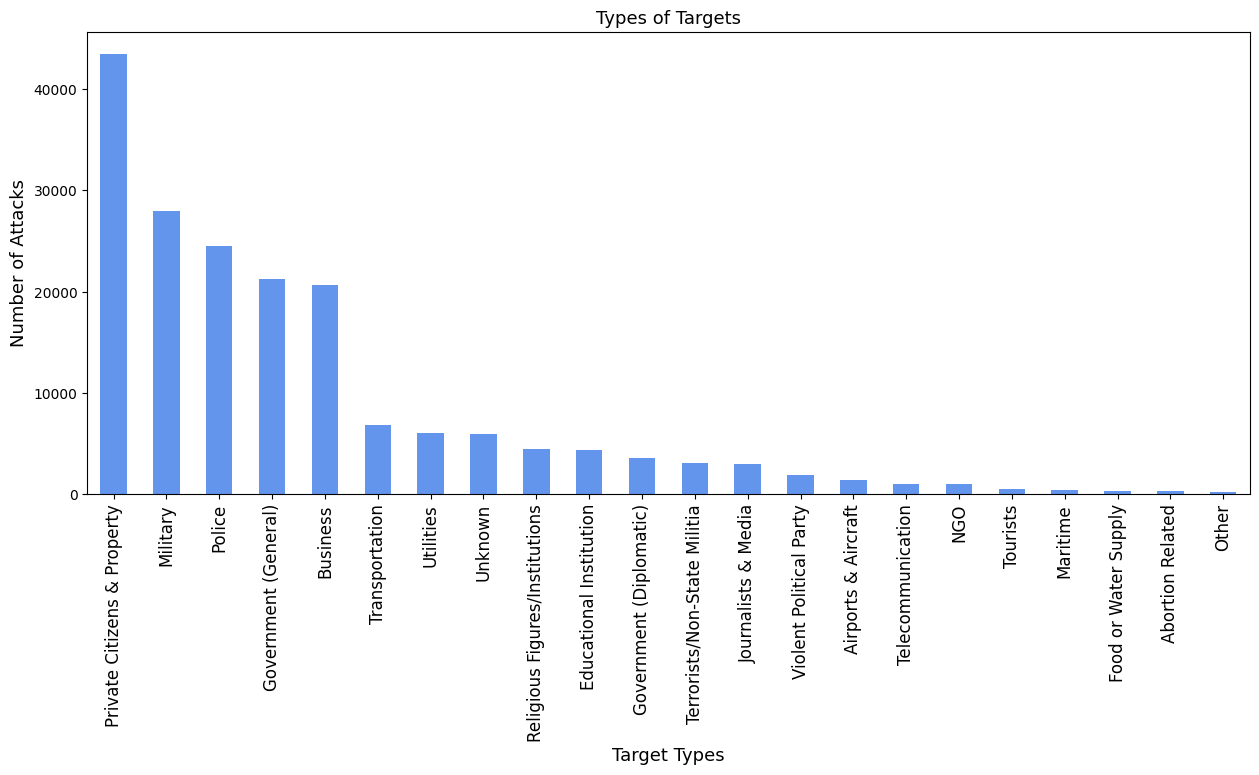

In [ ]:
ta.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [ ]:
tc=df[["target_type","casualty"]].groupby("target_type").sum().sort_values(by="casualty",ascending=False)
tc

,casualty
target_type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


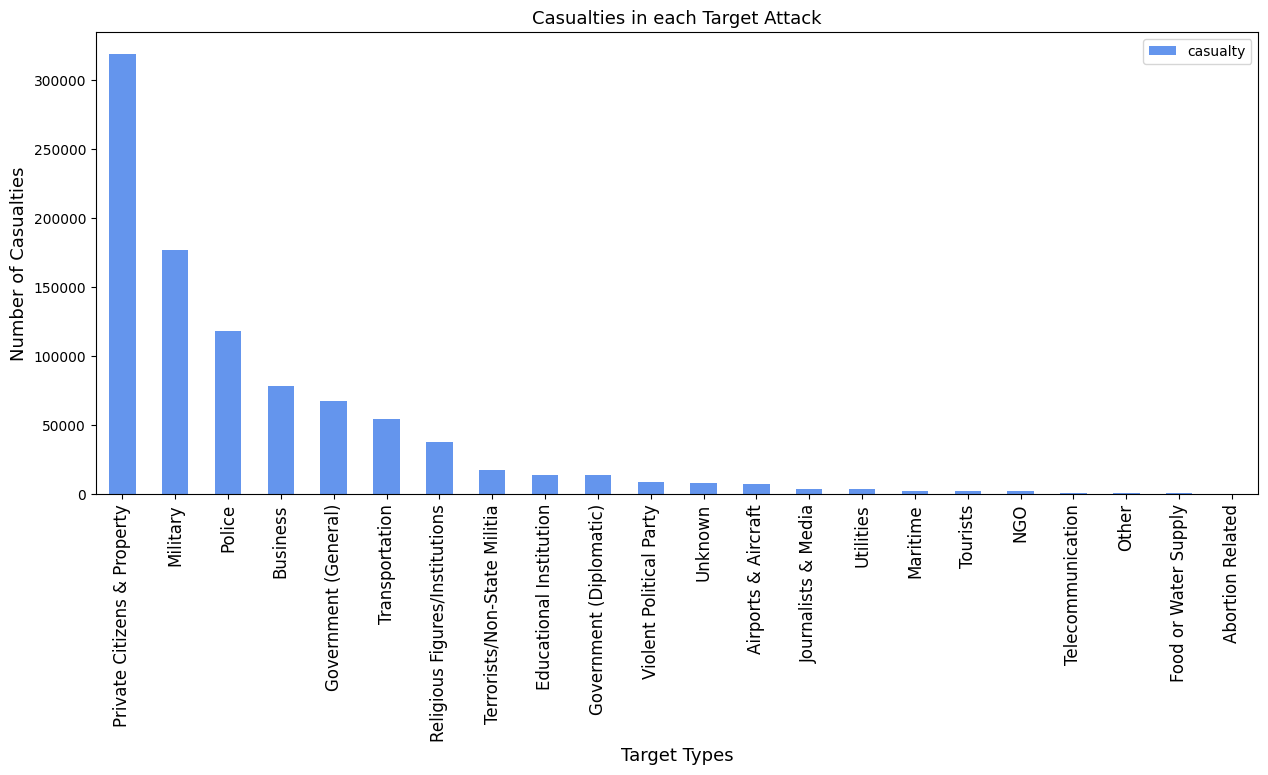

In [ ]:
tc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
tk=df[["target_type","killed"]].groupby("target_type").sum().sort_values(by="killed",ascending=False)
tk

,killed
target_type,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


In [ ]:
tw=df[["target_type","wounded"]].groupby("target_type").sum().sort_values(by="wounded",ascending=False)
tw

,wounded
target_type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


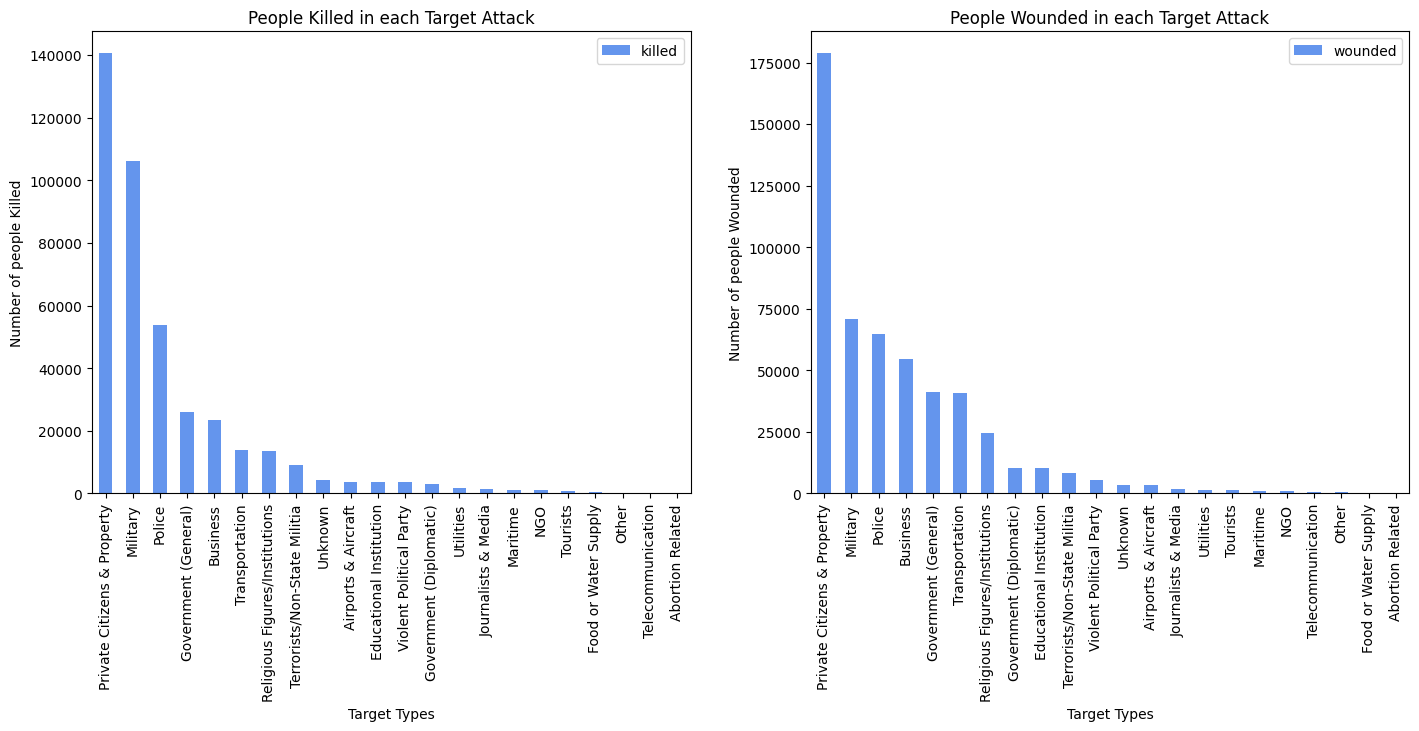

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
tw.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### 8. Group + Country wise - Top10

1. Sorting by number of Attacks

In [ ]:
gca=df[["group","country"]].value_counts().drop("Unknown")
gca.head(10)

<ipython-input-80-9fbac15b868d>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["group","country"]].value_counts().drop("Unknown")


group                                             country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

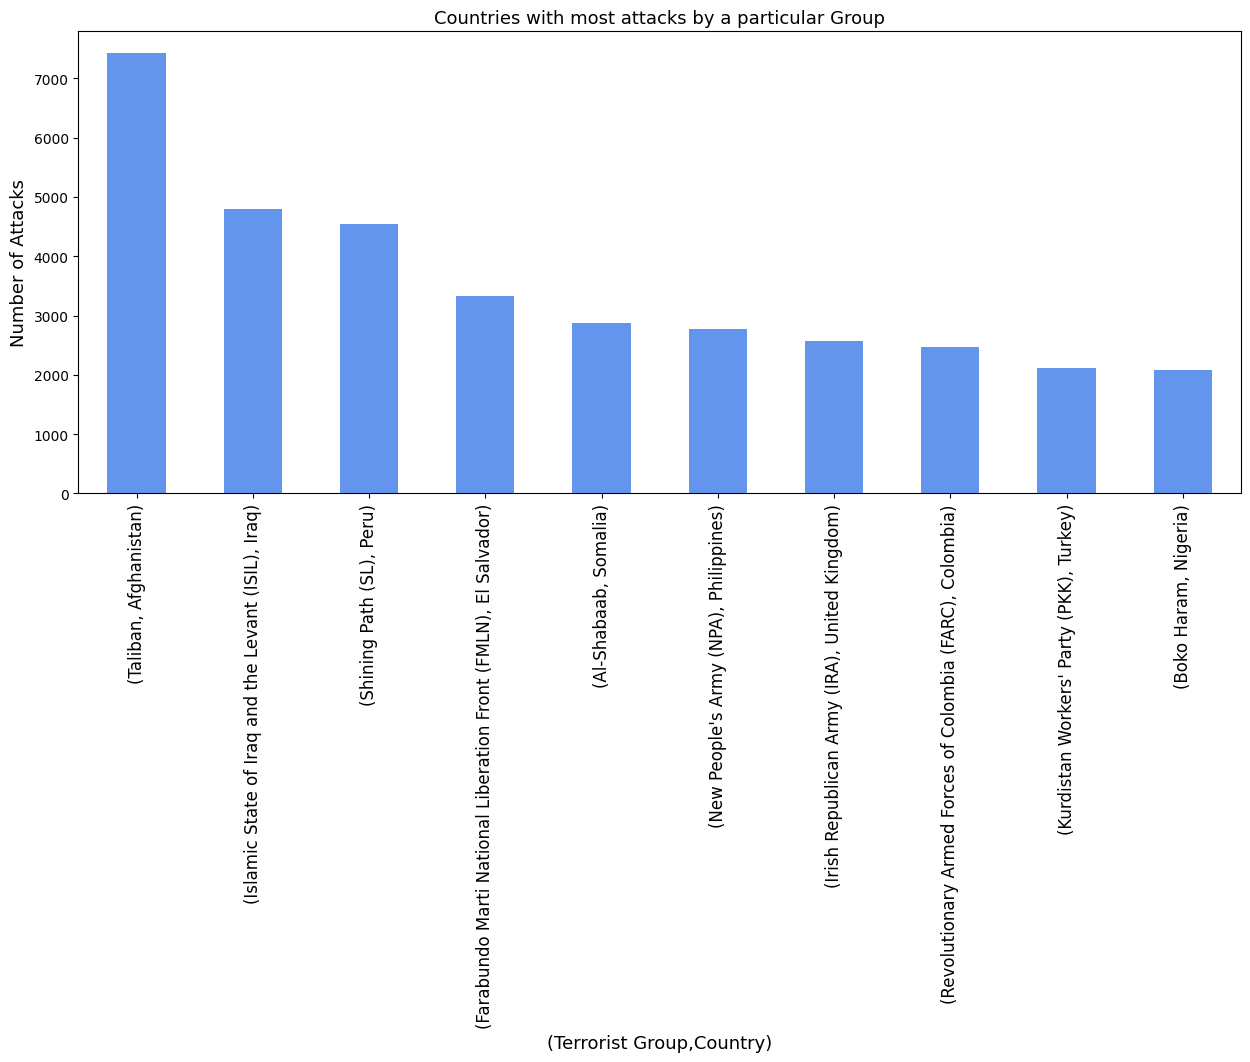

In [ ]:
gca.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Sorting by Number of Casualties

In [ ]:
gcc=df[["group","country","casualty"]].groupby(["group","country"],axis=0).sum().sort_values(by="casualty",ascending=False).drop("Unknown").head(10)
gcc

<ipython-input-82-d260c25e786f>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["group","country","casualty"]].groupby(["group","country"],axis=0).sum().sort_values(by="casualty",ascending=False).drop("Unknown").head(10)


,,casualty
group,country,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
Shining Path (SL),Peru,14625.0
Al-Qaida in Iraq,Iraq,14348.0
Al-Shabaab,Somalia,14201.0


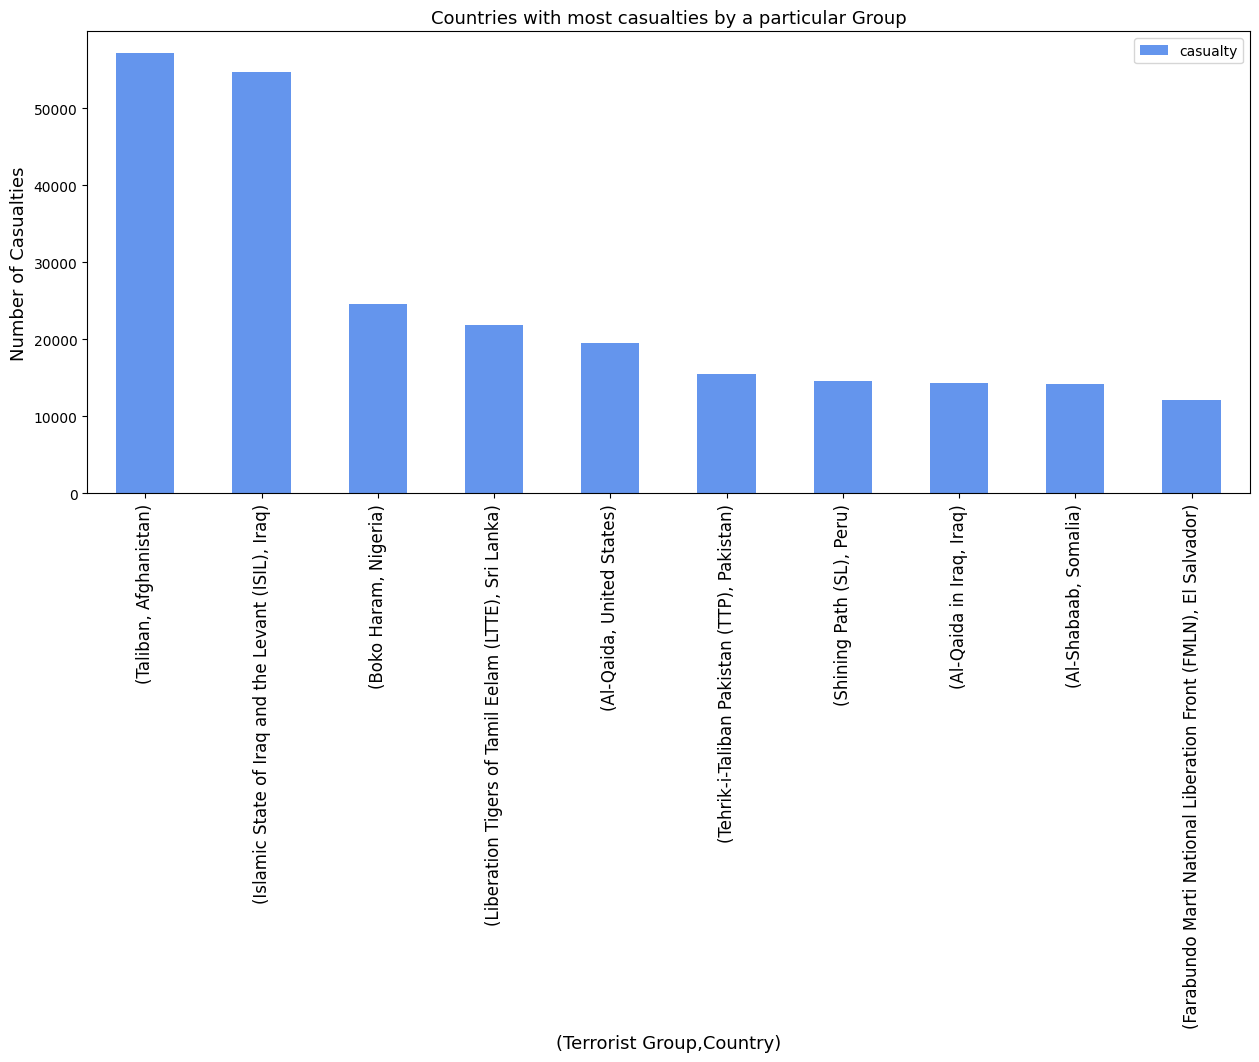

In [ ]:
gcc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Sorting by Number of People Killed 

In [ ]:
gck=df[["group","country","killed"]].groupby(["group","country"],axis=0).sum().sort_values(by="killed",ascending=False).drop("Unknown").head(10)
gck

<ipython-input-84-7be7d3e80828>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["group","country","killed"]].groupby(["group","country"],axis=0).sum().sort_values(by="killed",ascending=False).drop("Unknown").head(10)


,,killed
group,country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


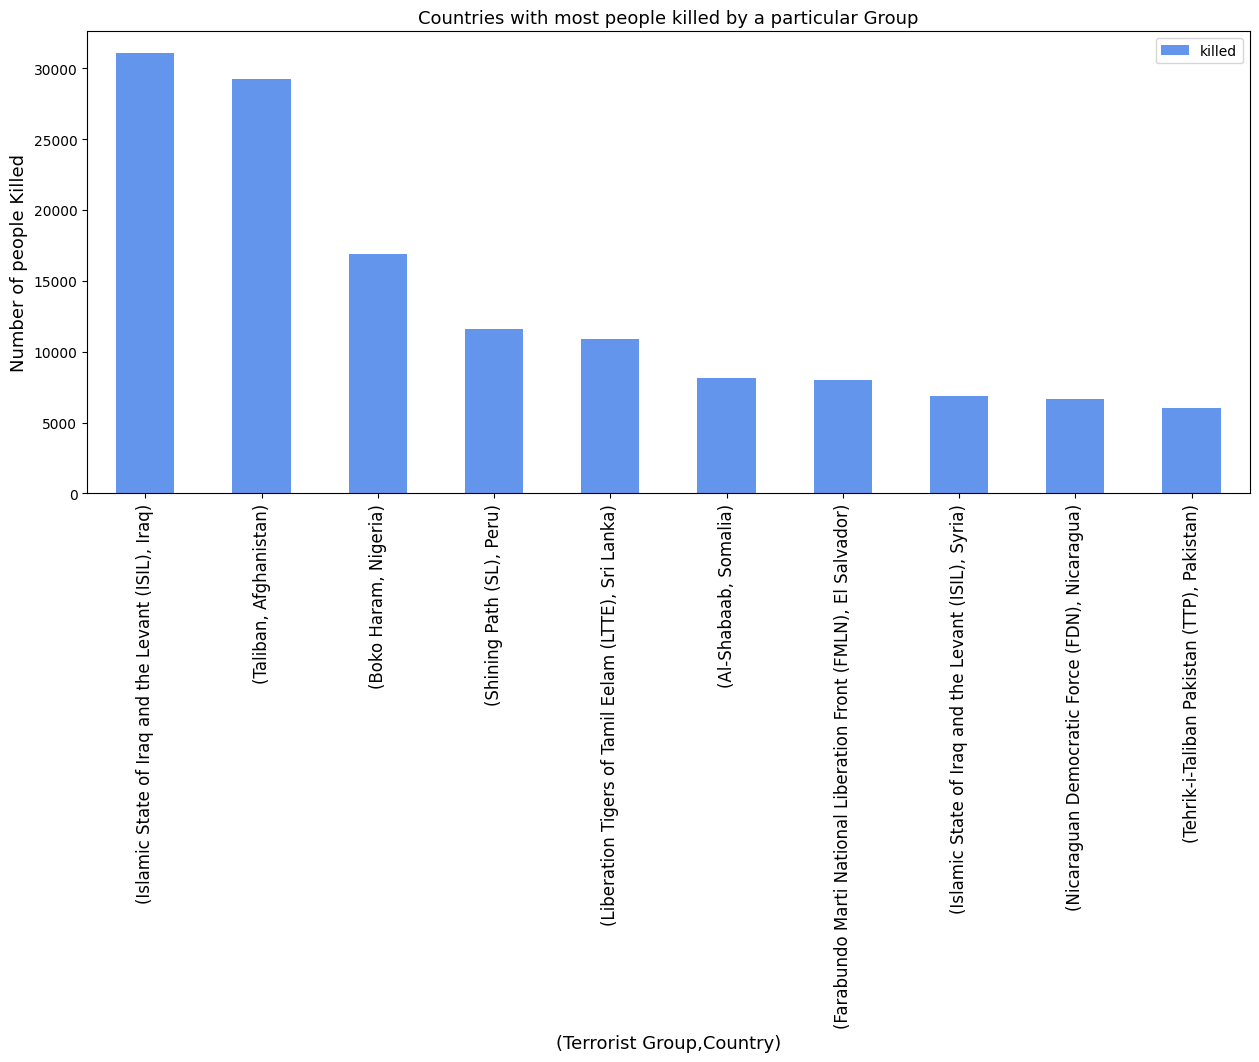

In [ ]:
gck.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

4. Sorting by Number of People Wounded

In [ ]:
gcw=df[["group","country","wounded"]].groupby(["group","country"],axis=0).sum().sort_values(by="wounded",ascending=False).drop("Unknown").head(10)
gcw

<ipython-input-86-9cb4b295fbd8>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw=df[["group","country","wounded"]].groupby(["group","country"],axis=0).sum().sort_values(by="wounded",ascending=False).drop("Unknown").head(10)


,,wounded
group,country,
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Al-Qaida,United States,16493.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Al-Qaida in Iraq,Iraq,10075.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,9518.0
Boko Haram,Nigeria,7671.0
Al-Shabaab,Somalia,6025.0
Aum Shinri Kyo,Japan,6003.0


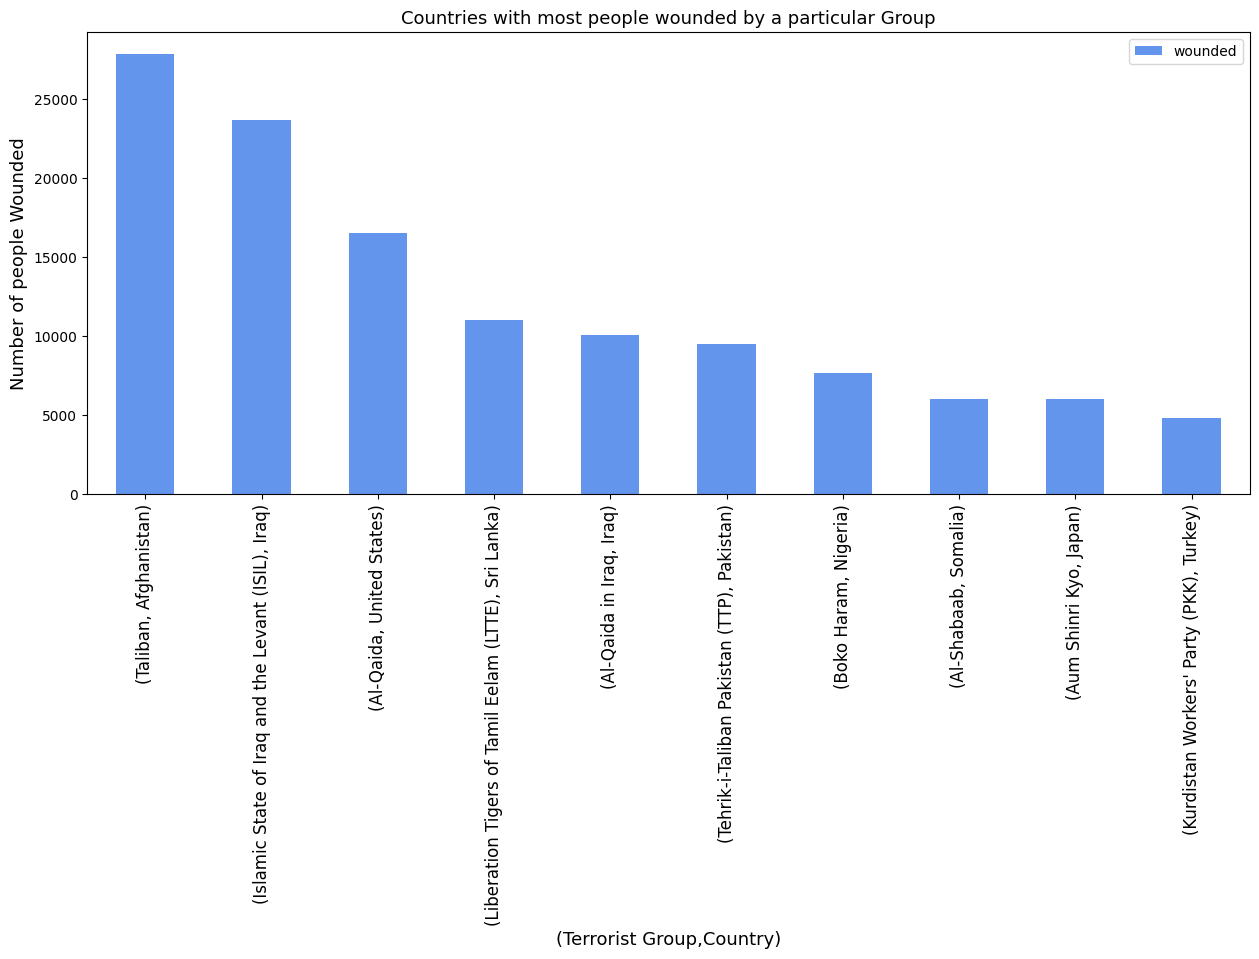

In [ ]:
gcw.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

### 9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017

1. Total Casualties (Killed + Wounded) due to Terrorist Attacks

In [ ]:
casualty=df.loc[:,"casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0


2. Killed due to Terrorist Attacks

In [ ]:
kill=df.loc[:,"killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0


3. Wounded due to Terrorist Attacks

In [ ]:
wound=df.loc[:,"wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0


# Observations 

1. Year wise Attacks : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 16903 in 2014 <br>
 &ensp; &ensp; (b) Least number of attacks: 471 in 1971 <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 85618 in 2014 <br>
 &ensp; &ensp; (b) Least number of casualties: 255 in 1971 <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed: 44490 in 2014 <br>
 &ensp; &ensp; (b) Least number of people killed: 173 in 1971 <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded: 44043 in 2015 <br>
 &ensp; &ensp; (b) Least number of people wounded: 82 in 1971 <br><br>
2. Region wise Attacks : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 50474 in "Middle East & North Africa"  <br>
 &ensp; &ensp; (b) Least number of attacks: 282 in "Australasia & Oceania"   <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 351950 in "Middle East & North Africa" <br>
 &ensp; &ensp; (b) Least number of casualties: 410 in Australasia & Oceania <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed: 137642 in "Middle East & North Africa" <br>
 &ensp; &ensp; (b) Least number of people killed: 150 in "Australasia & Oceania" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded: 214308 in "Middle East & North Africa" <br>
 &ensp; &ensp; (b) Least number of people wounded: 260 in "Australasia & Oceania" <br><br>
3. Country wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 24636 in "Iraq" <br>
 &ensp; &ensp; (b) Least number of attacks: 4292 in "Turkey" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 213279 in "Iraq" <br>
 &ensp; &ensp; (b) Least number of casualties: 22926 in "Philippines" <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed: 78589 in "Iraq" <br>
 &ensp; &ensp; (b) Least number of people killed: 12053 in "El Salvador" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded: 134690 in "Iraq" <br>
 &ensp; &ensp; (b) Least number of people wounded: 10328 in "Colombia" <br><br>
4. City wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 7589 in "Baghdad" <br>
 &ensp; &ensp; (b) Least number of attacks: 1019 in "Athens" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 77876 in "Baghdad" <br>
 &ensp; &ensp; (b) Least number of casualties: 5748 in "Aleppo" <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed: 21151 in "Baghdad" <br>
 &ensp; &ensp; (b) Least number of people killed: 2125 in "Aleppo" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded: 56725 in "Baghdad" <br>
 &ensp; &ensp; (b) Least number of people wounded: 4955 in "Mogadishu" <br><br>
5. Terrorist Group wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks : 7478 by "Taliban" <br>
 &ensp; &ensp; (b) Least number of attacks : 2418 by "Boko Haram" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties : 69595 by "Islamic State of Iraq and the Levant (ISIL)" <br>
 &ensp; &ensp; (b) Least number of casualties : 12130 by "Farabundo Marti National Liberation Front (FMLN)" <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed : 38923 by "Islamic State of Iraq and the Levant (ISIL)" <br>
 &ensp; &ensp; (b) Least number of people killed : 5661 by "Revolutionary Armed Forces of Colombia (FARC)" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded : 30672 by "Islamic State of Iraq and the Levant (ISIL)" <br>
 &ensp; &ensp; (b) Least number of people wounded : 4908 by "Kurdistan Workers' Party (PKK)" <br><br>
6. Attack Type wise Attacks: <br> 
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks : 88255 by "Bombing/Explosion" <br>
 &ensp; &ensp; (b) Least number of attacks : 659 by "Hijacking" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties : 530007 by "Bombing/Explosion" <br>
 &ensp; &ensp; (b) Least number of casualties : 7407 by "Facility/Infrastructure Attack" <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed : 160297 by "Armed Assault" <br>
 &ensp; &ensp; (b) Least number of people killed : 880 by "Unarmed Assault" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded : 372686 by "Bombing/Explosion" <br>
 &ensp; &ensp; (b) Least number of people wounded : 3765 by "Facility/Infrastructure Attack" <br><br>
7. Target Type wise Attacks: <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks : 43511 over "Private Citizens & Property" <br>
 &ensp; &ensp; (b) Least number of attacks : 263 over "Abortion Related" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties : 319176 over "Private Citizens & Property" <br>
 &ensp; &ensp; (b) Least number of casualties : 56 over "Abortion Related" <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed : 140504 over "Private Citizens & Property" <br>
 &ensp; &ensp; (b) Least number of people killed : 10 over "Abortion Related" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded : 178672 over "Private Citizens & Property" <br>
 &ensp; &ensp; (b) Least number of people wounded : 46 over "Abortion Related"<br><br>
8. Group and Country wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks : 7423 by "Taliban" in "Afghanistan" <br>
 &ensp; &ensp; (b) Least number of attacks : 2087 by "Boko Haram" in "Nigeria" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties : 57140 by "Taliban" in "Afghanistan" <br>
 &ensp; &ensp; (b) Least number of casualties : 12068 by "Farabundo Marti National Liberation Front (FMLN)"	in "El Salvador" <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed : 31058 by "Islamic State of Iraq and the Levant (ISIL)" in "Iraq" <br>
 &ensp; &ensp; (b) Least number of people killed : 6014 by "Tehrik-i-Taliban Pakistan (TTP)" in "Pakistan" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded : 27871 by "Taliban" in "Afghanistan" <br>
 &ensp; &ensp; (b) Least number of people wounded : 4795 by "Kurdistan Workers' Party (PKK)" in "Turkey" <br><br>
9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017 : <br>
&nbsp; (i) Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 935737 <br>
&nbsp; (ii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 411868 <br>
&nbsp; (iii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 523869 <br>